In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [3]:
def dsigmoid(x):
    return x * (1 - x)

In [4]:
def f(x):
    return (x**2)*math.sin(2*math.pi*x) + 0.7

In [5]:
def point(xVals, yVals):
    x = xVals[0] + xVals[1]*np.random.randn()
    y = yVals[0] + yVals[1]*np.random.randn()
    arr = np.array([x, y])
    return arr

In [73]:
#100 points are generated, with all the points stored in data, class0 in data0, 
#and class1 in data1
data = np.zeros((100, 3))
data0 = np.array([0, 0, 0]).reshape(1, 3)
i0 = 0
data1 = np.array([0, 0, 0]).reshape(1, 3)
i1 = 0
for i in range(100):
    p = point([0, 1], [0, 1])
    if f(p[0]) > p[1]:
        p = np.append(p, 0).reshape(1, 3)
        data0 = np.append(data0, p, 0)
    else:
        p = np.append(p, 1).reshape(1, 3)
        data1 = np.append(data1, p, 0)
    data[i] = p
data0 = np.delete(data0, 0, 0)
data1 = np.delete(data1, 0, 0)

In [30]:
def dataGen(n, xVar, yVar):
    #This function returns 3 arrays: data, data0, data1
    #len(data) = len(data0) + len(data1) = n
    #Data contains n points generated by points()
    data = np.ones((n, 3))
    data0 = np.array([0, 0]).reshape(1, 2)
    i0 = 0
    data1 = np.array([0, 0]).reshape(1, 2)
    i1 = 0
    for i in range(n):
        p = point(xVar, yVar).reshape(1, 2)
        if f(p[0,0]) > p[0,1]:
            data0 = np.append(data0, p, 0)
            p = np.append(p, 0).reshape(1, 3)
        else:
            data1 = np.append(data1, p, 0)
            p = np.append(p, 1).reshape(1, 3)
        data[i] = p
    data0 = np.delete(data0, 0, 0)
    data1 = np.delete(data1, 0, 0)
    return data, data0, data1

In [31]:
dataTrain = 0
dataTrain0 = 0
dataTrain1 = 0
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,3,1
hiddenWeights = 0
hiddenBias = 0
outputWeights = 0
outputBias = 0

In [32]:
def initData():
    #Generating training data
    dataTrain, dataTrain0, dataTrain1 = dataGen(100, [0, 1], [0, 1])
    #Initialising weights
    inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,3,1
    hiddenWeights = np.random.uniform(low = 0.1, size=(inputLayerNeurons,hiddenLayerNeurons))
    hiddenBias =np.random.uniform(low = 0.1, size=(1,hiddenLayerNeurons))
    outputWeights = np.random.uniform(low = 0.1, size=(hiddenLayerNeurons,outputLayerNeurons))
    outputBias = np.random.uniform(low = 0.1, size=(1,outputLayerNeurons))

In [140]:
#Generating training data
dataTrain, dataTrain0, dataTrain1 = dataGen(100, [0, 1], [0, 1])
#Initialising weights
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,3,1
hiddenWeights = np.random.randn(inputLayerNeurons,hiddenLayerNeurons)
hiddenBias =np.random.randn(1,hiddenLayerNeurons)
outputWeights = np.random.randn(hiddenLayerNeurons,outputLayerNeurons)
outputBias = np.random.randn(1,outputLayerNeurons)

In [141]:
#This trains the network
outputWeightsOld = np.array([10, 10, 10]).reshape((3, 1))
lmda = 0.01
alpha = 0.01
epsilon = 1e-5
i = 0
while i < 1000 and np.linalg.norm(outputWeights - outputWeightsOld) > epsilon:
    #outputWeightsOld = outputWeights
    for count, val in enumerate(dataTrain):
        a1 = val[:-1].reshape((2,1))
        z2 = hiddenWeights.T.dot(a1)
        z2 += hiddenBias.T
        a2 = sigmoid(z2)

        z3 = outputWeights.T.dot(a2)
        z3 += outputBias.T
        a3 = sigmoid(z3)

        del3 = val[-1] - a3
        err3 = del3 * dsigmoid(a3)

        del2 = del3.dot(outputWeights.T)
        err2 = del2 * dsigmoid(a2).T

        outputWeights += alpha*a2.dot(err3) - lmda*outputWeights
        #outputBias += alpha*np.sum(err3, axis=0, keepdims=True)
        hiddenWeights += alpha*a1.dot(err2) - lmda*hiddenWeights
        #hiddenBias += alpha*np.sum(err2, axis=0, keepdims=True)
        i += 1


In [142]:
dataVal, dataVal0, dataVal1 = dataGen(100, [0, 1], [0, 1])
count0 = len(dataVal0)
count1 = len(dataVal1)
corr0 = 0
corr1 = 0
for i in dataVal:
    p = predict(i)
    if i[-1] == 0:
        if p < 0.5:
            corr0 += 1
    else:
        if p >= 0.5:
            corr1 += 1
print(str(corr0) + "/" + str(count0))
print(str(corr1) + "/" + str(count1))

0/67
33/33


In [143]:
dataTest, dataTest0, dataTest1 = dataGen(100, [0, 1], [0, 1])
count0 = len(dataTest0)
count1 = len(dataTest1)
corr0 = 0
corr1 = 0
for i in dataTest:
    p = predict(i)
    if i[-1] == 0:
        if p < 0.5:
            corr0 += 1
    else:
        if p >= 0.5:
            corr1 += 1
print(str(corr0) + "/" + str(count0))
print(str(corr1) + "/" + str(count1))

0/70
30/30


In [124]:
print(outputWeightsOld)
print(outputWeights)

[[-0.57592237]
 [ 0.01735675]
 [ 0.10769589]]
[[-0.57592237]
 [ 0.01735675]
 [ 0.10769589]]


In [134]:
print("Hidden weights: ", end='')
print(hiddenWeights)
print("Hidden bias: ", end='')
print(hiddenBias)
print("Ouput weights: ", end='')
print(outputWeights)
print("Output bias: ", end='')
print(outputBias)


Hidden weights: [[ 5.23575794e-04  4.62976911e-04  7.59409873e-05]
 [-2.72150896e-03 -2.65858856e-03 -2.37091876e-04]]
Hidden bias: [[ 1.52126379 -0.09720092 -2.03813827]]
Ouput weights: [[-0.05027807]
 [-0.02913019]
 [-0.00701857]]
Output bias: [[0.35451899]]


In [126]:
#Using our trained network, return a prediction
def predict(val):
    a1 = val[:-1].reshape((2,1))
    z2 = hiddenWeights.T.dot(a1)
    z2 += hiddenBias.T
    a2 = sigmoid(z2)

    z3 = outputWeights.T.dot(a2)
    z3 += outputBias.T
    a3 = sigmoid(z3)
    return a3

In [135]:
#Calculating confusion matrix
count0 = len(dataTrain0)
count1 = len(dataTrain1)
corr0 = 0
corr1 = 0
for i in dataTrain:
    p = predict(i)
    if i[-1] == 0:
        if p < 0.5:
            corr0 += 1
    else:
        if p >= 0.5:
            corr1 += 1
print(str(corr0) + "/" + str(count0))
print(str(corr1) + "/" + str(count1))

0/67
33/33


In [116]:
alpha = 1e-5
epsilon = 1e-5

for i in range(1000):
    for count, val in enumerate(dataTrain):
        #Forward propogation
        hiddenLayerActivation = np.dot(val[0:2], hiddenWeights).reshape(1,3)
        hiddenLayerActivation += hiddenBias
        hiddenLayerOutput = sigmoid(hiddenLayerActivation)

        outputLayerActivation = np.dot(hiddenLayerOutput, outputWeights)
        outputLayerActivation += outputBias
        outputPrediction = sigmoid(outputLayerActivation)

        #Backpropogation
        deltaOutput = val[-1] - outputPrediction
        dOutput = deltaOutput * dsigmoid(outputPrediction)

        deltaHidden = dOutput.dot(outputWeights.T)
        dHidden = deltaHidden * dsigmoid(hiddenLayerOutput)
        print(dHidden)

        #Updating weights
        outputWeights += alpha*hiddenLayerOutput.T.dot(dOutput)
        outputBias += alpha*np.sum(dOutput, axis=0, keepdims=True)
        hiddenWeights += alpha*val[0:2].T.dot(dHidden)
        hiddenBias += alpha*np.sum(dHidden, axis=0, keepdims=True)

print("Done")

[[-0.03244871 -0.00481906 -0.01114743]]


ValueError: shapes (2,) and (1,3) not aligned: 2 (dim 0) != 1 (dim 0)

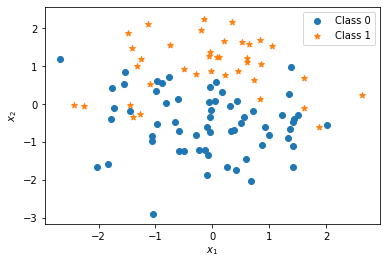

In [37]:
#Plotting the two diferent classes

plt.scatter(dataTrain0[:, 0], dataTrain0[:, 1], marker="o", label="Class 0")
plt.scatter(dataTrain1[:, 0], dataTrain1[:, 1], marker="*", label="Class 1")
plt.legend()
plt.xlabel('$\it{x_1}$')
plt.ylabel('$\it{x_2}$')
plt.show()

In [6]:
x1 = -1
x2 = 1
x3 = 2

a = sigmoid(-1 + 2*sigmoid(-1*x1 + 0.5*x2 + x3 + 1) + sigmoid(-2*x1 + x2 - x3 +2))
print(a)

0.8733158426540304
